# ML Clustering Spotify Project

<img src="spotify-logo.jpg">

In [21]:
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
df = pd.read_csv('./df_audio_features_10.csv')
df.head(10)

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


## Preprocessing using min max scaler

In [22]:
scaler = MinMaxScaler()
df.loudness = scaler.fit_transform(df[['loudness']])
df.loudness

0    1.000000
1    0.971414
2    0.597610
3    0.554880
4    0.804648
5    0.779548
6    0.751594
7    0.713347
8    0.000000
9    0.292331
Name: loudness, dtype: float64

In [23]:
df.tempo = scaler.fit_transform(df[['tempo']])
df.tempo

0    0.602076
1    0.442503
2    0.842866
3    0.697799
4    1.000000
5    0.891797
6    0.725362
7    0.684332
8    0.000484
9    0.000000
Name: tempo, dtype: float64

In [24]:
df.duration_ms = scaler.fit_transform(df[['duration_ms']])
df.duration_ms

0    0.574526
1    0.530220
2    0.311930
3    0.632941
4    0.281123
5    0.726085
6    1.000000
7    0.863249
8    0.000000
9    0.482266
Name: duration_ms, dtype: float64

In [25]:
df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,1.000000,0,0.0828,0.49700,0.000002,0.1160,0.8440,0.602076,0.574526,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,0.971414,0,0.0572,0.03020,0.000000,0.0454,0.7600,0.442503,0.530220,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,0.597610,1,0.1400,0.85400,0.000000,0.1050,0.4910,0.842866,0.311930,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,0.554880,1,0.0390,0.86700,0.001660,0.1050,0.3880,0.697799,0.632941,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,0.804648,1,0.0926,0.04930,0.002440,0.3990,0.6120,1.000000,0.281123,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,0.779548,1,0.0307,0.06140,0.036700,0.3300,0.9310,0.891797,0.726085,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,0.751594,1,0.1080,0.00314,0.867000,0.1110,0.0598,0.725362,1.000000,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,0.713347,1,0.0377,0.00548,0.901000,0.1110,0.1980,0.684332,0.863249,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,0.000000,1,0.0519,0.98900,0.596000,0.1040,0.2110,0.000484,0.000000,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,0.292331,1,0.0364,0.99000,0.913000,0.1120,0.0710,0.000000,0.482266,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


## Select relevant features for clustering

In [26]:

X = df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
X

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.851,0.84900,1.000000,0,0.0828,0.49700,0.000002,0.1160,0.8440,0.602076,0.574526
1,0.949,0.66100,0.971414,0,0.0572,0.03020,0.000000,0.0454,0.7600,0.442503,0.530220
2,0.642,0.33900,0.597610,1,0.1400,0.85400,0.000000,0.1050,0.4910,0.842866,0.311930
3,0.641,0.14000,0.554880,1,0.0390,0.86700,0.001660,0.1050,0.3880,0.697799,0.632941
4,0.464,0.79500,0.804648,1,0.0926,0.04930,0.002440,0.3990,0.6120,1.000000,0.281123
5,0.733,0.79400,0.779548,1,0.0307,0.06140,0.036700,0.3300,0.9310,0.891797,0.726085
6,0.749,0.73100,0.751594,1,0.1080,0.00314,0.867000,0.1110,0.0598,0.725362,1.000000
7,0.736,0.84500,0.713347,1,0.0377,0.00548,0.901000,0.1110,0.1980,0.684332,0.863249
8,0.184,0.00833,0.000000,1,0.0519,0.98900,0.596000,0.1040,0.2110,0.000484,0.000000
9,0.387,0.04510,0.292331,1,0.0364,0.99000,0.913000,0.1120,0.0710,0.000000,0.482266


## Determine optimal number of clusters (K) using Elbow Method

In [27]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

c:\Python\Python3113\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3113\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3113\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python3113\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

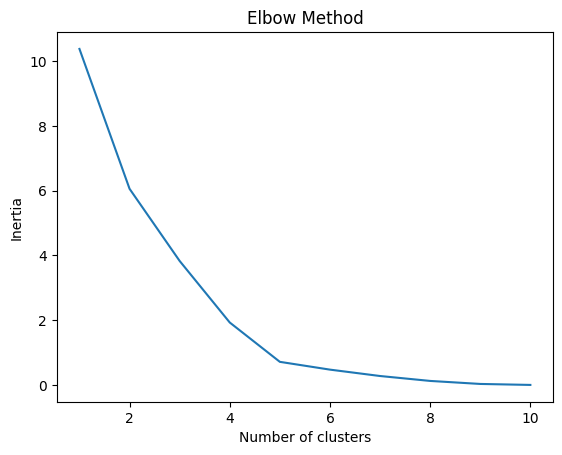

In [28]:
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Perform K-means clustering with chosen number of clusters (10) 
kmeans_model = KMeans(n_clusters=10)
kmeans_model.fit(X)

c:\Python\Python3113\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [30]:
# Add predicted labels back into original dataframe 
df['cluster'] = kmeans_model.labels_
df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
0,My Band,D12,0.851,0.84900,1,1.000000,0,0.0828,0.49700,0.000002,0.1160,0.8440,0.602076,0.574526,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...,7
1,The Real Slim Shady,Eminem,0.949,0.66100,5,0.971414,0,0.0572,0.03020,0.000000,0.0454,0.7600,0.442503,0.530220,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...,3
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,0.597610,1,0.1400,0.85400,0.000000,0.1050,0.4910,0.842866,0.311930,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...,8
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,0.554880,1,0.0390,0.86700,0.001660,0.1050,0.3880,0.697799,0.632941,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...,4
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,0.804648,1,0.0926,0.04930,0.002440,0.3990,0.6120,1.000000,0.281123,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...,0
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,0.779548,1,0.0307,0.06140,0.036700,0.3300,0.9310,0.891797,0.726085,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...,6
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,0.751594,1,0.1080,0.00314,0.867000,0.1110,0.0598,0.725362,1.000000,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...,2
7,In Silence,Amelie Lens,0.736,0.84500,1,0.713347,1,0.0377,0.00548,0.901000,0.1110,0.1980,0.684332,0.863249,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...,9
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,0.000000,1,0.0519,0.98900,0.596000,0.1040,0.2110,0.000484,0.000000,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...,5
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,0.292331,1,0.0364,0.99000,0.913000,0.1120,0.0710,0.000000,0.482266,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...,1


## Visualize clustered data

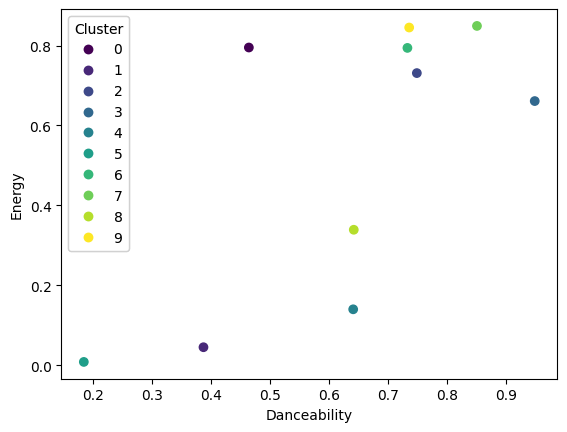

In [31]:

fig, ax = plt.subplots()
scatter = ax.scatter(df['danceability'], df['energy'], c=df['cluster'])
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

### In this projectt:
- We load the Spotify music dataset from a 'df_audio_features_10.csv' file. 
- We select relevant features for clustering from the DataFrame `df`.
- We use the elbow method to determine an optimal number of clusters and then perform K-means clustering using `KMeans` class from scikit-learn.
- The predicted cluster labels are added back into the original dataframe.
- Finally, we visualize clustered data using scatter plot where danceability and energy are plotted against each other and colored by their respective cluster.